# Semantic chunk data exploration

Now that we have the text data split into semantic chunks, let's load them up and take a quick look at what we have.

## Notebook setup

In [1]:
# Change working directory to parent so we can import as we would from the perplexity ratio score root directory
%cd ..

# PyPI imports
import pandas as pd

# Internal imports
import configuration as config
import notebooks.helper_functions.plotting_functions as plot_funcs

/home/siderealyear/projects/llm_detector/perplexity_ratio_score


## 1. Data loading

In [2]:
data_file=f'{config.INTERMEDIATE_DATA_PATH}/all_chunks.json'
data_df=pd.read_json(data_file)
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24667559 entries, 0 to 24667558
Data columns (total 4 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   text       object
 1   synthetic  int64 
 2   author     object
 3   source     object
dtypes: int64(1), object(3)
memory usage: 752.8+ MB


In [3]:
data_df.head()

,text,synthetic,author,source
0,A powerful story about a culture clash and the...,0,human,grinberg
1,"Still, there's been plenty of speculation abou...",1,unknown_model,yatsenko
2,Bowen’s family system theory can be used to di...,0,human,grinberg
3,● Why? – The gene that controls the direction ...,0,human,yatsenko
4,be more safety for everyone.,0,human,gerami


## 2. Data composition

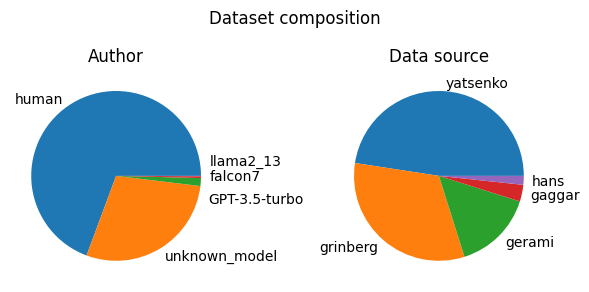

In [4]:
plot_obj=plot_funcs.data_composition(data_df)
plot_obj.savefig(f'{config.PLOT_PATH}/06-2_data_composition.jpg')
plot_obj.show()

## 3. Text length

In [5]:
data_df['words']=data_df['text'].apply(lambda x: len(x.split(' ')))
data_df['words'].describe()

count    2.466756e+07
mean     2.975418e+01
std      7.286530e+01
min      1.000000e+00
25%      1.000000e+01
50%      1.500000e+01
75%      2.700000e+01
max      4.157600e+04
Name: words, dtype: float64

### 3.1. Length distributions: all text

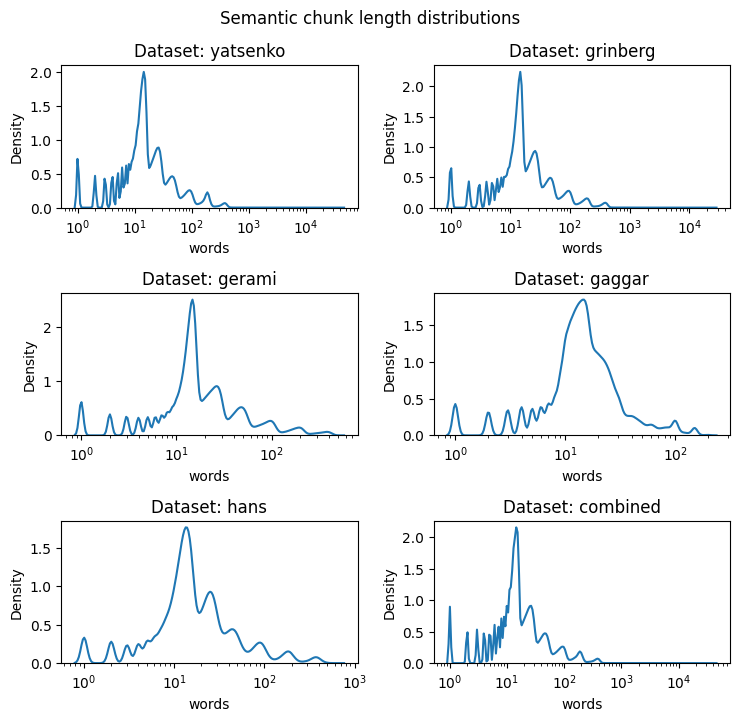

In [6]:
plot_obj=plot_funcs.length_distributions('Semantic chunk length distributions', data_df)
plot_obj.savefig(f'{config.PLOT_PATH}/06-3.1_semantic_chunk_length_distributions.jpg')
plot_obj.show()

Just for fun, let's take a look at the chunk length distributions for human vs machine text. But before we do - let's provisionally get rid of any single word chunks - we can pretty clearly justify that as a splitting failure, if nothing else. Let's also trim off very long chunks.

### 3.2. Length distributions: human vs synthetic

In [7]:
# Length threshold the data
working_data_df=data_df[data_df['words'] > 1]
working_data_df=working_data_df[working_data_df['words'] < 1024]

# Replace int values for 'synthetic' with human readable strings
working_data_df['synthetic']=working_data_df['synthetic'].map({0: 'human', 1: 'synthetic'})
working_data_df.head()

,text,synthetic,author,source,words
0,A powerful story about a culture clash and the...,human,human,grinberg,97
1,"Still, there's been plenty of speculation abou...",synthetic,unknown_model,yatsenko,26
2,Bowen’s family system theory can be used to di...,human,human,grinberg,25
3,● Why? – The gene that controls the direction ...,human,human,yatsenko,15
4,be more safety for everyone.,human,human,gerami,5


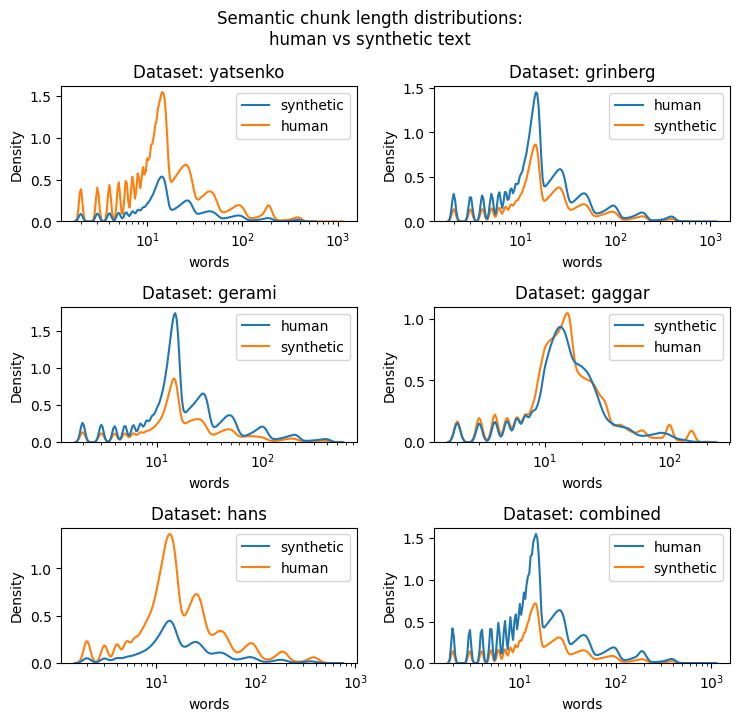

In [8]:
plot_obj=plot_funcs.length_distributions(
    'Semantic chunk length distributions:\nhuman vs synthetic text',
    working_data_df, 
    hue_by='synthetic'
)

plot_obj.savefig(f'{config.PLOT_PATH}/06-3.2_human_vs_synthetic_length_distributions.jpg')
plot_obj.show()

OK - I see differences. Let's try plotting the histogram bin fractions against each other for synthetic and human text.

### 3.3. Length bin density: human vs synthetic

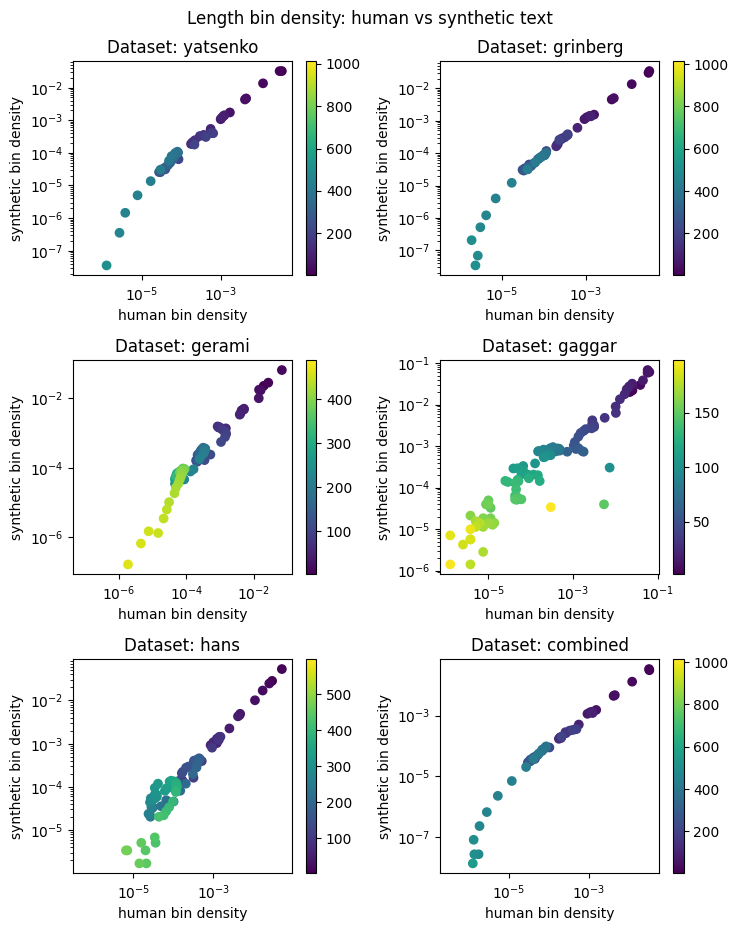

In [9]:
plot_obj=plot_funcs.bin_density_scatter(
    'Length bin density: human vs synthetic text',
    working_data_df
)

plot_obj.savefig(f'{config.PLOT_PATH}/06-3.3_human_vs_synthetic_length_bin_density_scatter.jpg')
plot_obj.show()